In [4]:
# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
anime_df = pd.read_csv("anime_watchers_dataset_10000.csv")

# Quick check
anime_df.info()
anime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Watcher_ID                  10000 non-null  object 
 1   Name                        10000 non-null  object 
 2   Age                         10000 non-null  int64  
 3   Gender                      10000 non-null  object 
 4   Country                     10000 non-null  object 
 5   Start_Year_Watching         10000 non-null  int64  
 6   Favorite_Anime_Genre        10000 non-null  object 
 7   Most_Watched_Anime_Title    10000 non-null  object 
 8   Anime_Era_Preference        10000 non-null  object 
 9   Average_Weekly_Watch_Hours  10000 non-null  int64  
 10  Primary_Platform            10000 non-null  object 
 11  Is_Manga_Reader             10000 non-null  object 
 12  Engagement_Level            10000 non-null  object 
 13  Community_Participation     8318

,Watcher_ID,Name,Age,Gender,Country,Start_Year_Watching,Favorite_Anime_Genre,Most_Watched_Anime_Title,Anime_Era_Preference,Average_Weekly_Watch_Hours,Primary_Platform,Is_Manga_Reader,Engagement_Level,Community_Participation,Merchandise_Spending_USD,Top_3_Anime_List,Preferred_Language,Favorite_Character,Device_Used_for_Watching,Year_of_Birth
0,W00001,User00001,50,Female,Canada,1998,Shounen,Neon Genesis Evangelion,Golden Era,12,DVD,No,Low,MyAnimeList,22.04,"Sailor Moon, Fullmetal Alchemist, One Piece",Dubbed English,Char_570,TV,1975
1,W00002,User00002,61,Male,UK,2015,Fantasy,Chainsaw Man,Modern Era,30,Crunchyroll,No,High,MyAnimeList,2704.33,"Spy x Family, Jujutsu Kaisen, My Hero Academia",Japanese w/ Subtitles,Char_776,Smartphone,1964
2,W00003,User00003,15,Female,Italy,2025,Fantasy,Chainsaw Man,Modern Era,6,YouTube,Yes,Medium,Reddit,195.12,"Haikyuu!!, My Hero Academia, Demon Slayer",Japanese w/ Subtitles,Char_759,Tablet,2010
3,W00004,User00004,32,Female,Spain,2002,Fantasy,Sailor Moon,Golden Era,12,DVD,No,Medium,Cosplay Events,212.56,"Neon Genesis Evangelion, Cowboy Bebop, Sailor ...",Spanish Dub,Char_136,TV,1993
4,W00005,User00005,23,Female,Germany,2020,Isekai,Re:Zero,Modern Era,15,Amazon Prime,Yes,High,Discord,4987.81,"Sword Art Online, Re:Zero, Jujutsu Kaisen",Japanese w/ Subtitles,Char_1044,PC,2002


In [8]:
# Drop missing values in Preferred Language
anime_df = anime_df.dropna(subset=['Preferred_Language'])

# Map Preferred Language → Categories
lang_map = {
    'Japanese w/ Subtitles': 'Subtitles',
    'Dubbed English': 'Dubbing',
    'Spanish Dub': 'Dubbing',
    'Raw Japanese': 'No Subtitles'
}
anime_df['Language_Category'] = anime_df['Preferred_Language'].map(lang_map)

# Create Age Groups
bins = [0, 17, 25, 35, 50, 100]
labels = ['<18','18-25','26-35','36-50','50+']
anime_df['Age_Group'] = pd.cut(anime_df['Age'], bins=bins, labels=labels)

# Map countries into regions (expand as needed)
region_map = {
    'USA':'North America', 'Canada':'North America',
    'UK':'Europe', 'Germany':'Europe', 'France':'Europe', 'Italy':'Europe', 'Spain':'Europe',
    'Brazil':'Latin America', 'Mexico':'Latin America',
    'India':'Asia', 'Japan':'Asia', 'China':'Asia'
}
anime_df['Region'] = anime_df['Country'].map(region_map).fillna('Other')

Language_Category
Subtitles    50.967894
Dubbing      49.032106
Name: proportion, dtype: float64


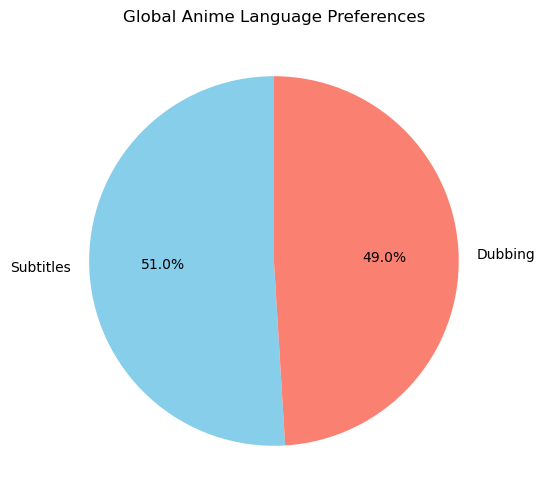

In [10]:
# Global counts
global_pref = anime_df['Language_Category'].value_counts(normalize=True) * 100
print(global_pref)

# Pie chart
anime_df['Language_Category'].value_counts().plot.pie(
    autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=['skyblue','salmon','lightgreen'])
plt.title("Global Anime Language Preferences")
plt.ylabel("")
plt.show()

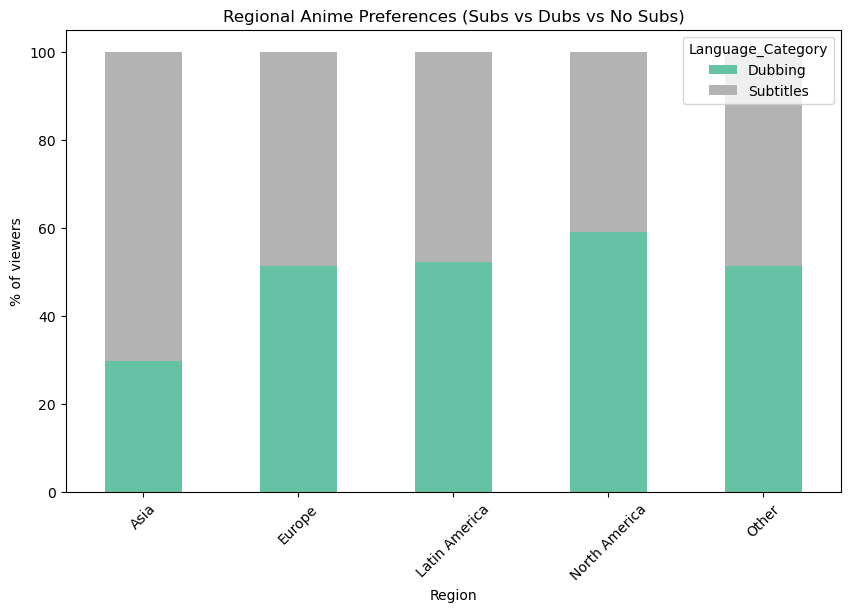

In [12]:
region_pref = pd.crosstab(anime_df['Region'], anime_df['Language_Category'], normalize='index') * 100

region_pref.plot(kind='bar', stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Regional Anime Preferences (Subs vs Dubs vs No Subs)")
plt.ylabel("% of viewers")
plt.xticks(rotation=45)
plt.show()

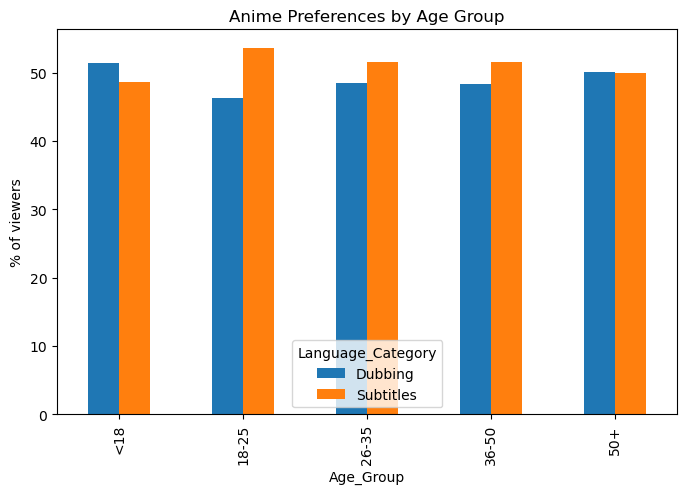

In [14]:
age_pref = pd.crosstab(anime_df['Age_Group'], anime_df['Language_Category'], normalize='index') * 100

age_pref.plot(kind='bar', figsize=(8,5))
plt.title("Anime Preferences by Age Group")
plt.ylabel("% of viewers")
plt.show()

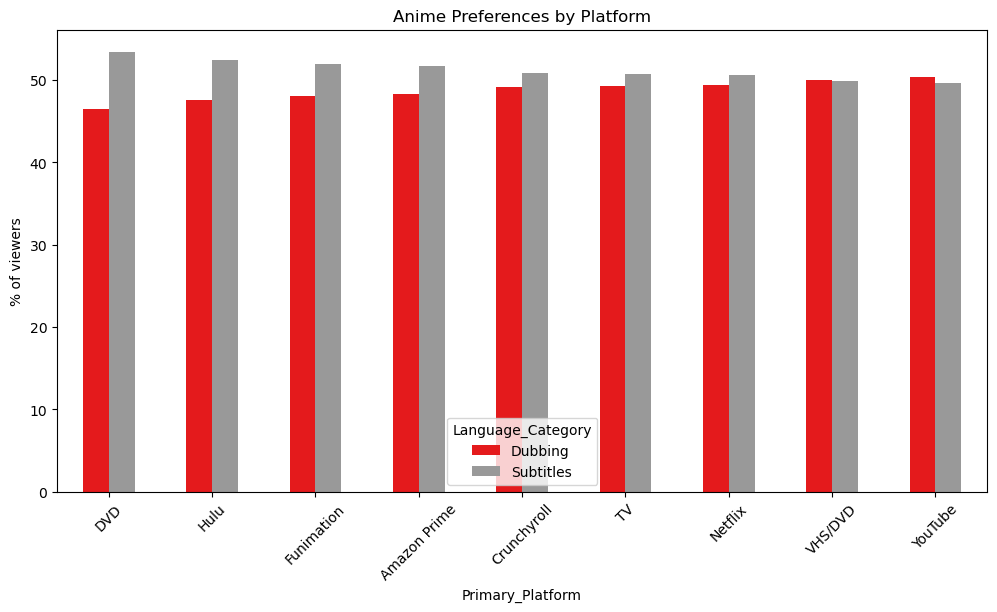

In [16]:
platform_pref = pd.crosstab(anime_df['Primary_Platform'], anime_df['Language_Category'], normalize='index') * 100

platform_pref.sort_values('Subtitles', ascending=False).plot(
    kind='bar', figsize=(12,6), colormap="Set1")
plt.title("Anime Preferences by Platform")
plt.ylabel("% of viewers")
plt.xticks(rotation=45)
plt.show()

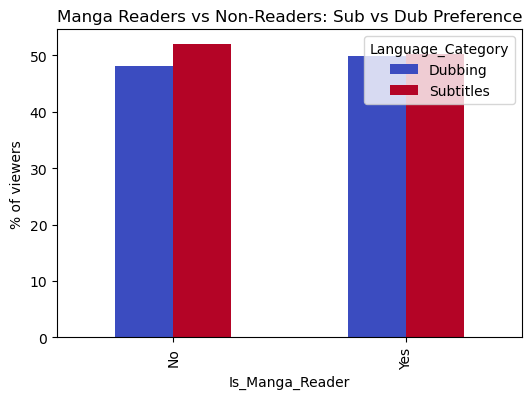

In [18]:
manga_pref = pd.crosstab(anime_df['Is_Manga_Reader'], anime_df['Language_Category'], normalize='index') * 100

manga_pref.plot(kind='bar', figsize=(6,4), colormap="coolwarm")
plt.title("Manga Readers vs Non-Readers: Sub vs Dub Preference")
plt.ylabel("% of viewers")
plt.show()

In [20]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(anime_df['Region'], anime_df['Language_Category'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square test p-value:", p)
if p < 0.05:
    print("✅ Significant difference in language preference across regions")
else:
    print("❌ No significant difference detected")

Chi-square test p-value: 1.6096232553903109e-60
✅ Significant difference in language preference across regions


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load data (adjust path if needed)
DATA_PATH = Path("anime_watchers_dataset_10000.csv")
df = pd.read_csv(DATA_PATH)

# Ensure language category exists
LANG_MAP = {
    "Japanese w/ Subtitles": "Subtitles",
    "Dubbed English": "Dubbing",
    "Spanish Dub": "Dubbing",
    "Raw Japanese": "No Subtitles",
}
df["Language_Category"] = df["Preferred_Language"].map(LANG_MAP).fillna("Other")

# Quick sanity
print(df["Language_Category"].value_counts())

Language_Category
Subtitles    4318
Dubbing      4154
Other        1528
Name: count, dtype: int64


Language_Category,Dubbing,Other,Subtitles
Favorite_Anime_Genre,,,
Comedy,40.8,15.0,44.2
Fantasy,41.0,13.4,45.6
Horror,47.7,11.2,41.1
Isekai,41.3,15.8,42.9
Mecha,44.8,14.3,40.9
Romance,40.6,15.7,43.7
Seinen,43.2,14.3,42.5
Shojo,41.8,15.8,42.5
Shounen,41.0,15.4,43.6


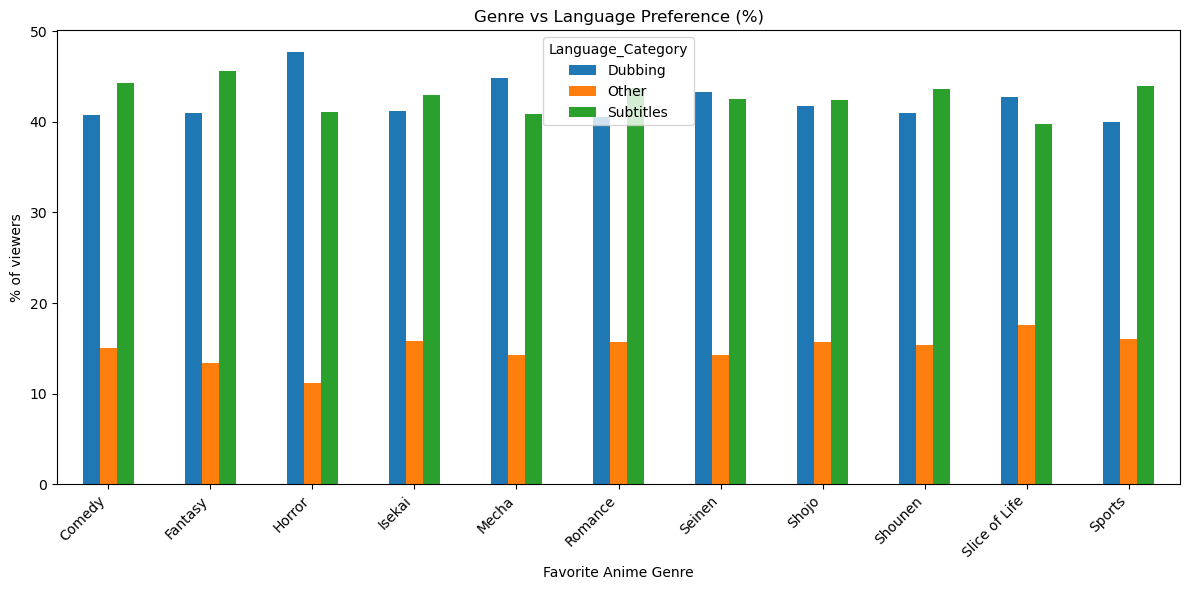

In [28]:
# Check column names in your file first:
# print(df.columns.tolist())

genre_col = "Favorite_Anime_Genre"
if genre_col in df.columns:
    genre_pref = pd.crosstab(df[genre_col], df["Language_Category"], normalize="index") * 100
    display(genre_pref.round(1))

    ax = genre_pref.plot(kind="bar", figsize=(12,6))
    ax.set_title("Genre vs Language Preference (%)")
    ax.set_ylabel("% of viewers")
    ax.set_xlabel("Favorite Anime Genre")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{genre_col}' not found.")

Language_Category,Dubbing,Other,Subtitles
Anime_Era_Preference,,,
Classic Era,40.9,16.2,42.9
Golden Era,42.5,14.4,43.0
Modern Era,41.1,15.6,43.3


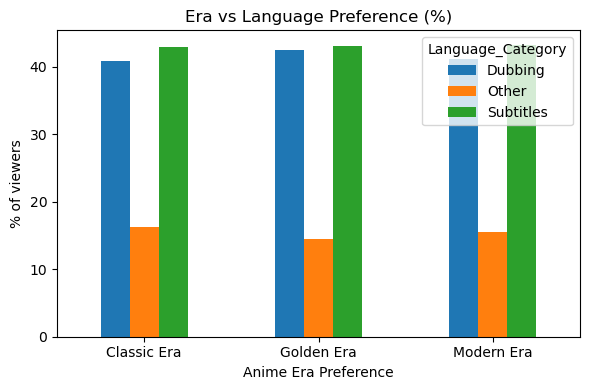

In [30]:
era_col = "Anime_Era_Preference"  # e.g., "Golden Era", "Modern Era"
if era_col in df.columns:
    era_pref = pd.crosstab(df[era_col], df["Language_Category"], normalize="index") * 100
    display(era_pref.round(1))

    ax = era_pref.plot(kind="bar", figsize=(6,4))
    ax.set_title("Era vs Language Preference (%)")
    ax.set_ylabel("% of viewers")
    ax.set_xlabel("Anime Era Preference")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{era_col}' not found.")

Language_Category,Dubbing,Other,Subtitles
Engagement_Level,,,
High,41.1,15.2,43.8
Low,40.2,17.8,42.0
Medium,42.8,14.8,42.4


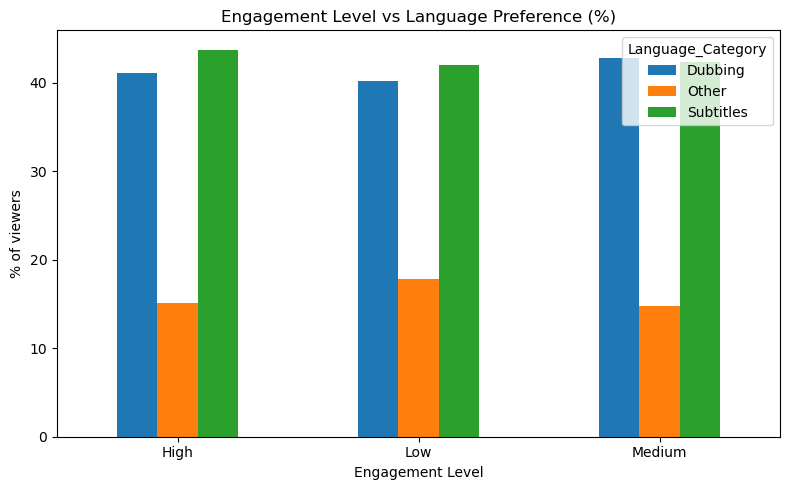

In [32]:
eng_col = "Engagement_Level"  # e.g., "Low / Medium / High" or similar labels
if eng_col in df.columns:
    engage_pref = pd.crosstab(df[eng_col], df["Language_Category"], normalize="index") * 100
    display(engage_pref.round(1))

    ax = engage_pref.plot(kind="bar", figsize=(8,5))
    ax.set_title("Engagement Level vs Language Preference (%)")
    ax.set_ylabel("% of viewers")
    ax.set_xlabel("Engagement Level")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{eng_col}' not found.")

,count,mean,std,min,25%,50%,75%,max
Language_Category,,,,,,,,
Dubbing,4154.0,1564.804319,1563.147870,1.52,233.7675,831.615,2794.1500,4998.61
Other,1528.0,1615.091459,1603.420370,0.06,229.3600,910.885,2999.0075,4996.32
Subtitles,4318.0,1632.275012,1590.397296,0.36,242.7025,948.660,3001.8150,4998.41


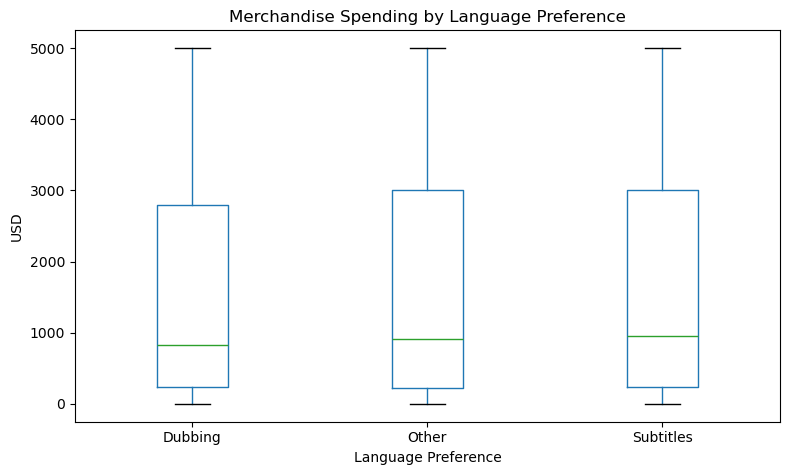

In [34]:
spend_col = "Merchandise_Spending_USD"
if spend_col in df.columns:
    # Basic summary by preference
    spend_summary = df.groupby("Language_Category")[spend_col].describe()
    display(spend_summary)

    # Boxplot
    df.boxplot(column=spend_col, by="Language_Category", grid=False, figsize=(8,5))
    plt.title("Merchandise Spending by Language Preference")
    plt.suptitle("")  # remove automatic super title
    plt.ylabel("USD")
    plt.xlabel("Language Preference")
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{spend_col}' not found.")

Language_Category,Dubbing,Other,Subtitles
Start_Year_Watching,,,
2016,39.1,18.7,42.2
2017,42.0,15.8,42.2
2018,38.5,14.7,46.8
2019,42.5,17.0,40.5
2020,41.2,18.7,40.1
2021,43.5,16.6,40.0
2022,38.7,15.7,45.6
2023,36.8,15.1,48.0
2024,42.1,17.4,40.5


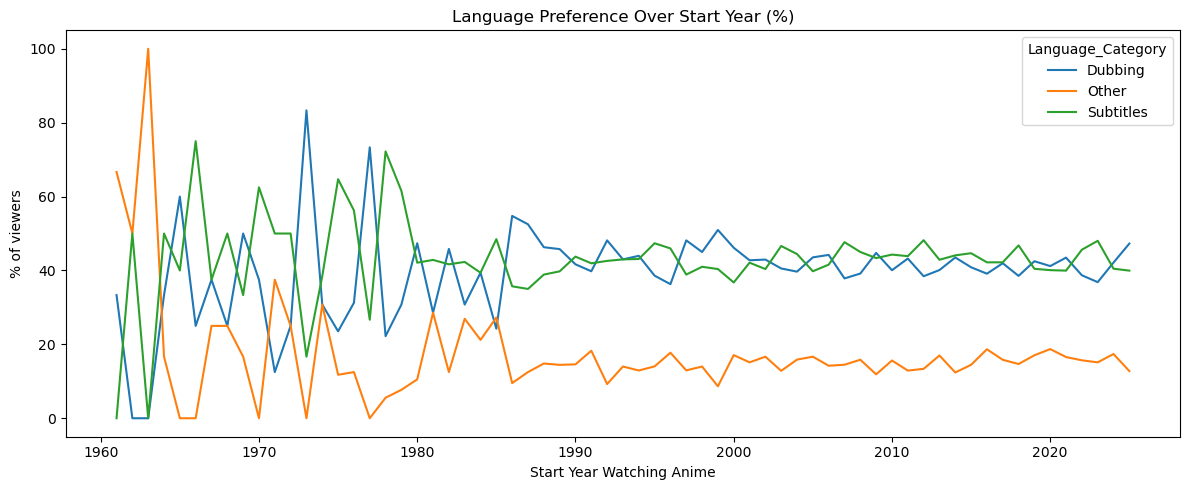

In [36]:
year_col = "Start_Year_Watching"
if year_col in df.columns:
    # Drop NaN / non-sensical years
    f = df.dropna(subset=[year_col, "Language_Category"]).copy()
    # Keep reasonable year range if present (e.g., 1960–2025)
    # f = f[(f[year_col] >= 1960) & (f[year_col] <= 2025)]

    trend = pd.crosstab(f[year_col], f["Language_Category"], normalize="index") * 100
    display(trend.tail(10).round(1))  # peek at recent years

    ax = trend.plot(figsize=(12,5))
    ax.set_title("Language Preference Over Start Year (%)")
    ax.set_ylabel("% of viewers")
    ax.set_xlabel("Start Year Watching Anime")
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{year_col}' not found.")

Language_Category,Dubbing,Other,Subtitles
Cohort,,,
Early (pre-2000),42.6,14.5,42.9
Mid (2000–2014),41.5,14.6,43.9
Recent (2015+),41.2,16.1,42.8


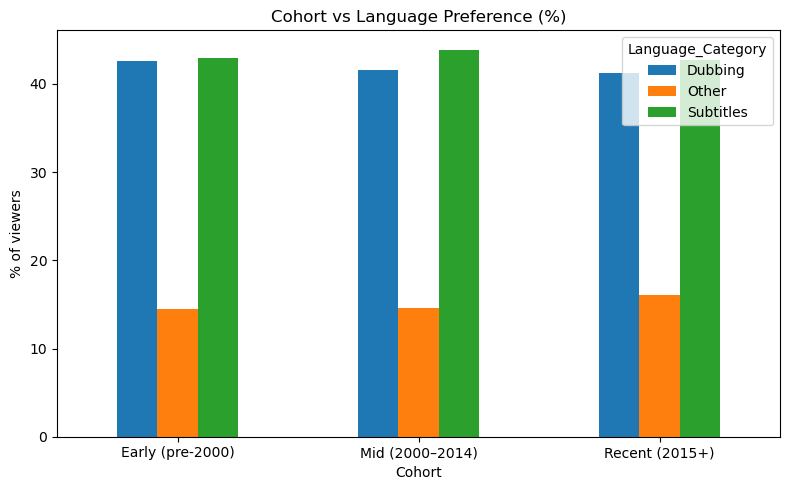

In [38]:
if year_col in df.columns:
    f = df.dropna(subset=[year_col, "Language_Category"]).copy()
    def cohort(y):
        if y < 2000: return "Early (pre-2000)"
        elif y >= 2015: return "Recent (2015+)"
        else: return "Mid (2000–2014)"
    f["Cohort"] = f[year_col].apply(cohort)

    cohort_pref = pd.crosstab(f["Cohort"], f["Language_Category"], normalize="index") * 100
    display(cohort_pref.round(1))

    ax = cohort_pref.loc[["Early (pre-2000)", "Mid (2000–2014)", "Recent (2015+)"]].plot(kind="bar", figsize=(8,5))
    ax.set_title("Cohort vs Language Preference (%)")
    ax.set_ylabel("% of viewers")
    ax.set_xlabel("Cohort")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()